# Tugas Akhir Jaringan Saraf Tiruan
# Prediksi Stroke Menggunakan Algoritma Backpropagation dengan Modifikasi Bobot Menggunakan Nguyen

Kelompok Cukurukuk

1. Naufal Putra Sutrisna / 215150201111001
2. Rafifa Addin Sahirah / 215150200111007
3. Rahmada Zulvia Azzahra Hawari / 215150200111062

## Import Data

### Mengunduh dataset yang didapatkan dari kaggle yang telah dimasukkan kedalam google drive

In [215]:
! wget https://drive.google.com/uc?id=10wwXKiXXWqNlNVhA7yK7TSxhv73NEL8K -O stroke.csv

--2023-12-25 14:36:26--  https://drive.google.com/uc?id=10wwXKiXXWqNlNVhA7yK7TSxhv73NEL8K
Resolving drive.google.com (drive.google.com)... 142.250.99.138, 142.250.99.139, 142.250.99.102, ...
Connecting to drive.google.com (drive.google.com)|142.250.99.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-04-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/fjk1ud30i1q32fgrkl9dmi1chsr2mh6r/1703514975000/05465759236126144840/*/10wwXKiXXWqNlNVhA7yK7TSxhv73NEL8K?uuid=ef4a5b19-669d-4eff-b15d-0d10e72ef81f [following]
--2023-12-25 14:36:27--  https://doc-10-04-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/fjk1ud30i1q32fgrkl9dmi1chsr2mh6r/1703514975000/05465759236126144840/*/10wwXKiXXWqNlNVhA7yK7TSxhv73NEL8K?uuid=ef4a5b19-669d-4eff-b15d-0d10e72ef81f
Resolving doc-10-04-docs.googleusercontent.com (doc-10-04-docs.googleusercontent.com)... 74.125.142.132, 2607:f8b0:400e:c08::84
Connecting to doc-10

### import semua library yang akan digunakan

In [216]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import seaborn as sns

In [217]:
data = pd.read_csv('stroke.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [218]:
data.shape

(5110, 12)

### Menghapus id yang ada dalam dataset tersebut

In [219]:
data = data.drop('id', axis=1)
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Mengecek missing value

In [220]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [221]:
missing_values_count = data.isna().sum()

total_cells = np.product(data.shape)
total_missing = missing_values_count.sum()
percent_missing = (total_missing / total_cells) * 100
print("Persentase data yang hilang dari dataset : {}%".format(percent_missing))

Persentase data yang hilang dari dataset : 0.35758761786159043%


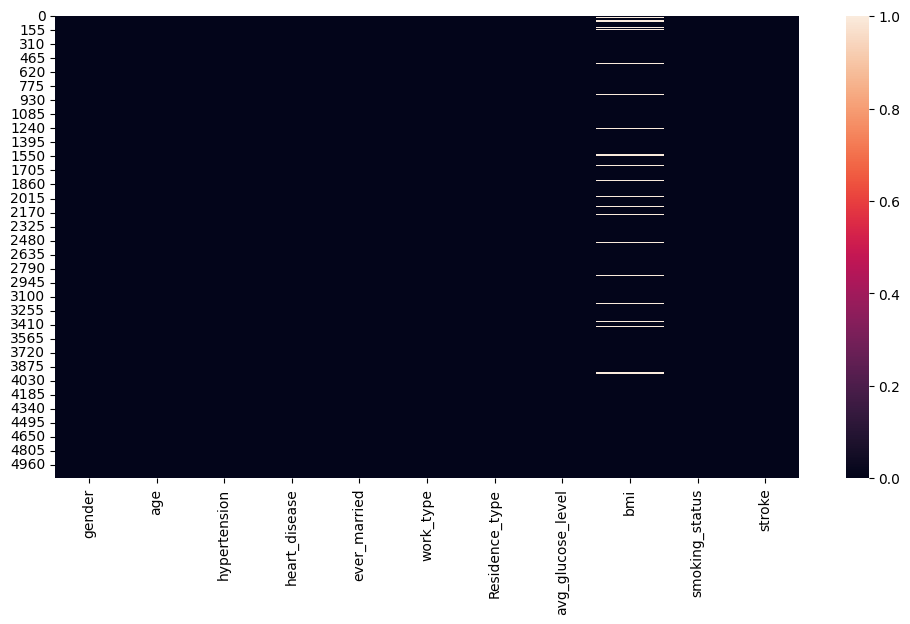

In [222]:
plt.figure(figsize = (12,6))
sns.heatmap(data.isnull())
plt.show()

In [223]:
data['bmi'].fillna(data['bmi'].mean(), inplace=True)

In [224]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [225]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


## Data Preprocessing

### Kolom Gender

In [226]:
data["gender"].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [227]:
data.drop(data[data['gender'] == 'Other'].index, inplace = True)
data["gender"].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

### Kolom Hypertension

In [228]:
data["hypertension"].value_counts()

0    4611
1     498
Name: hypertension, dtype: int64

### Kolom Heart Disease

In [229]:
data["heart_disease"].value_counts()

0    4833
1     276
Name: heart_disease, dtype: int64

### Kolom Ever Married

In [230]:
data["ever_married"].value_counts()

Yes    3353
No     1756
Name: ever_married, dtype: int64

### Kolom Work Type

In [231]:
data["work_type"].value_counts()

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

### Kolom Residence Type

In [232]:
data["Residence_type"].value_counts()

Urban    2596
Rural    2513
Name: Residence_type, dtype: int64

### Kolom Avg Glucose Level

In [233]:
avg_glucose_level = list(data['avg_glucose_level'].values)
hist_data = [avg_glucose_level]
group_labels = ["avg_glucose_level"]
fig = ff.create_distplot(hist_data,group_labels,show_hist = True)
fig.show()

In [234]:
cond1 = data['avg_glucose_level'] > 170
cond2 = data['stroke'] == 1
print("Total outlier dalam avg_glucose_level yang memiliki gejala stroke : ", data[cond1 & cond2].shape)

Total outlier dalam avg_glucose_level yang memiliki gejala stroke :  (83, 11)


Karena jumlah data outliernya sebesar 83, maka kami tidak menghilangkannya agar data yang akan diproses tidak terlalu seidikit

### Kolom BMI

In [235]:
bmi = list(data['bmi'].values)
hist_data = [bmi]
group_labels = ["bmi"]
fig = ff.create_distplot(hist_data,group_labels,show_hist = True)
fig.show()

In [236]:
cond1 = data['bmi'] > 47
cond2 = data['stroke'] == 1
print("Total outlier dalam BMI yang memiliki gejala stroke : ", data[cond1 & cond2].shape)

Total outlier dalam BMI yang memiliki gejala stroke :  (3, 11)


Menghapus outlier pada kolom bmi

In [237]:
data.drop(data[data['bmi'] > 47].index, inplace = True)

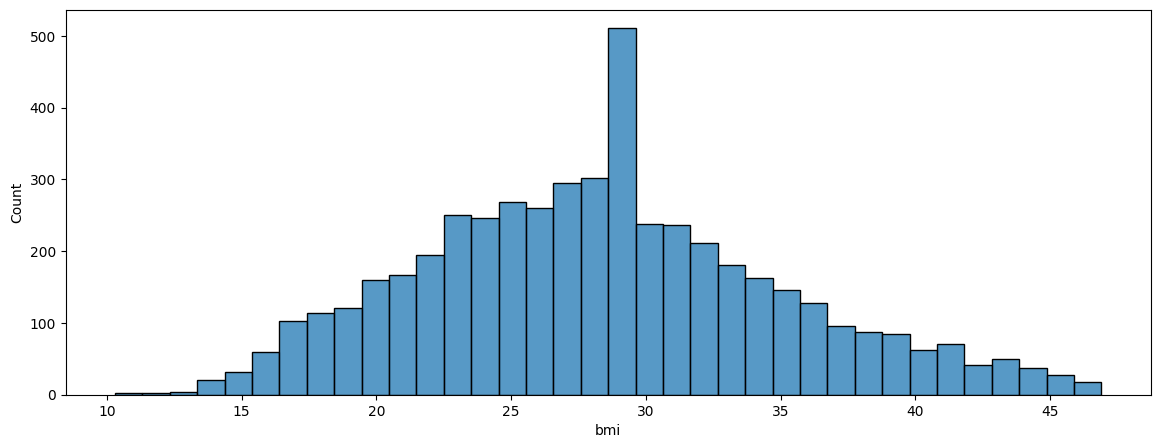

In [238]:
plt.figure(figsize = (14,5))
sns.histplot(x=data['bmi'])
plt.show()

### Kolom Smoking Status

In [239]:
data["smoking_status"].value_counts()

never smoked       1840
Unknown            1519
formerly smoked     861
smokes              772
Name: smoking_status, dtype: int64

In [240]:
data['smoking_status'] = data['smoking_status'].replace({
    'never smoked': 1,
    'Unknown': 2,
    'formerly smoked': 3,
    'smokes': 4
})

### Kolom Stroke

In [241]:
data["stroke"].value_counts()

0    4746
1     246
Name: stroke, dtype: int64

## One-Hot Encoding dan Decoding

In [242]:
def onehot_enc(lbl, min_val=0):
  mi = min(lbl)
  enc = np.full((len(lbl), max(lbl) - mi + 1), min_val, np.int8)

  for i, x in enumerate(lbl):
    enc[i, x - mi] = 1

  return enc


def onehot_dec(enc, mi=0):
  return [np.argmax(e) + mi for e in enc]

In [243]:
def onehot_enc_str(lbl):
    unique_classes = sorted(list(set(lbl)))
    num_classes = len(unique_classes)
    class_to_index = {c: i for i, c in enumerate(unique_classes)}
    enc = np.zeros((len(lbl), num_classes), dtype=np.int8)

    for i, cls in enumerate(lbl):
        enc[i, class_to_index[cls]] = 1

    return enc

def onehot_dec_str(enc, unique_classes):
    decoded_classes = []

    for row in enc:
        class_index = np.argmax(row)
        decoded_classes.append(unique_classes[class_index])

    return decoded_classes

## Membuat Fungsi Aktivasi Sigmoid

In [244]:
def sig(X):
  return [1 / (1 + np.exp(-x)) for x in X]


def sigd(X):
  output = []

  for i, x in enumerate(X):
    s = sig([x])[0]

    output.append(s * (1 - s))

  return output

## Membuat Training Backpropagation

In [245]:
def bp_fit(X, target, layer_conf, max_epoch, max_error=.1, learn_rate=.1, print_per_epoch=100):
  np.random.seed(1)
  nin = [np.empty(i) for i in layer_conf]
  n = [np.empty(j + 1) if i < len(layer_conf) - 1 else np.empty(j) for i, j in enumerate(layer_conf)]

  w = np.array([np.random.rand(layer_conf[i] + 1, layer_conf[i + 1]) for i in range(len(layer_conf) - 1)])
  # Update bobot dengan metode Nguyen-Widrow
  for i in range(len(w)):
    beta = 0.7 * (layer_conf[i + 1] ** (1 / layer_conf[i]))
    w[i] *= beta / np.linalg.norm(w[i], axis=0)

  dw = [np.empty((layer_conf[i] + 1, layer_conf[i + 1])) for i in range(len(layer_conf) - 1)]
  d = [np.empty(s) for s in layer_conf[1:]]
  din = [np.empty(s) for s in layer_conf[1:-1]]
  epoch = 0
  mse = 1

  for i in range(0, len(n)-1):
    n[i][-1] = 1

  while (max_epoch == -1 or epoch < max_epoch) and mse > max_error:
    epoch += 1
    mse = 0

    for r in range(len(X)):
      n[0][:-1] = X[r]

      for L in range(1, len(layer_conf)):
        nin[L] = np.dot(n[L-1], w[L-1])
        n[L][:len(nin[L])] = sig(nin[L])

      e = target[r] - n[-1]
      mse += sum(e ** 2)
      d[-1] = e * sigd(nin[-1])
      dw[-1] = learn_rate * d[-1] * n[-2].reshape((-1, 1))

      for L in range(len(layer_conf) - 1, 1, -1):
        din[L-2] = np.dot(d[L-1], np.transpose(w[L-1][:-1]))
        d[L-2] = din[L-2] * np.array(sigd(nin[L-1]))
        dw[L-2] = (learn_rate * d[L-2]) * n[L-2].reshape((-1, 1))

      w += dw

    mse /= len(X)

    if print_per_epoch > -1 and epoch % print_per_epoch == 0:
      print(f'Epoch {epoch}, MSE: {mse}')

  return w, epoch, mse

## Membuat Testing Backpropagation

In [246]:
def bp_predict(X, w):
  n = [np.empty(len(i)) for i in w]
  nin = [np.empty(len(i[0])) for i in w]
  predict = []

  n.append(np.empty(len(w[-1][0])))

  for x in X:
    n[0][:-1] = x

    for L in range(0, len(w)):
      nin[L] = np.dot(n[L], w[L])
      n[L + 1][:len(nin[L])] = sig(nin[L])

    predict.append(n[-1].copy())

  return predict

## Drop Data Yang Tidak Diperlukan

In [247]:
columns_to_drop = ['gender', 'ever_married', 'work_type',
                    'Residence_type']

data.drop(columns=columns_to_drop, inplace=True)

In [248]:
data.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,67.0,0,1,228.69,36.600000,3,1
1,61.0,0,0,202.21,28.893237,1,1
2,80.0,0,1,105.92,32.500000,1,1
3,49.0,0,0,171.23,34.400000,4,1
4,79.0,1,0,174.12,24.000000,1,1


## Normalisasi Data


In [249]:
def minmax(df):
  features = df.iloc[:, :-1]
  label = df.iloc[:, -1]

  scaled_features = (features - features.min()) / (features.max() - features.min())

  scaled_df = pd.concat([scaled_features, label], axis=1)

  return scaled_df

In [250]:
data = minmax(data)

In [251]:
data.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,0.816895,0.0,1.0,0.801265,0.718579,0.666667,1
1,0.743652,0.0,0.0,0.679023,0.508012,0.000000,1
2,0.975586,0.0,1.0,0.234512,0.606557,0.000000,1
3,0.597168,0.0,0.0,0.536008,0.658470,1.000000,1
4,0.963379,1.0,0.0,0.549349,0.374317,0.000000,1


## Split Data Train dan Test


In [252]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import accuracy_score

X = data.iloc[:, :-1].values
Y = data['stroke'].values

In [253]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2, stratify=Y, random_state=42)

In [254]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

In [255]:
y_train_resampled = onehot_enc(y_train_resampled)
y_test = onehot_enc(y_test)

In [256]:
w, ep, mse = bp_fit(X_train_resampled, y_train_resampled, layer_conf=(6, 3, 2), learn_rate=0.01, max_epoch=300, max_error=0.1, print_per_epoch=25)

print(f'Epochs: {ep}, MSE: {mse}')

predict = bp_predict(X_test, w)
predict = onehot_dec(predict)
y_test = onehot_dec(y_test)
accuracy = accuracy_score(predict, y_test)

print('Output:', predict)
print('True :', y_test)
print('Accuracy:', accuracy)

<ipython-input-245-4c7a60bb3c1b>:6: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

<ipython-input-245-4c7a60bb3c1b>:42: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



Epoch 25, MSE: 0.48961895147375356
Epoch 50, MSE: 0.47192929725610816
Epoch 75, MSE: 0.43051979937135637
Epoch 100, MSE: 0.37972358432630804
Epoch 125, MSE: 0.3472941659540292
Epoch 150, MSE: 0.33086343035110083
Epoch 175, MSE: 0.32251965308948527
Epoch 200, MSE: 0.3179926539913182
Epoch 225, MSE: 0.3153664523480688
Epoch 250, MSE: 0.313753532095023
Epoch 275, MSE: 0.3127120411372868
Epoch 300, MSE: 0.31200782844550956
Epochs: 300, MSE: 0.31200782844550956
Output: [1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,

## Confusion Matrix

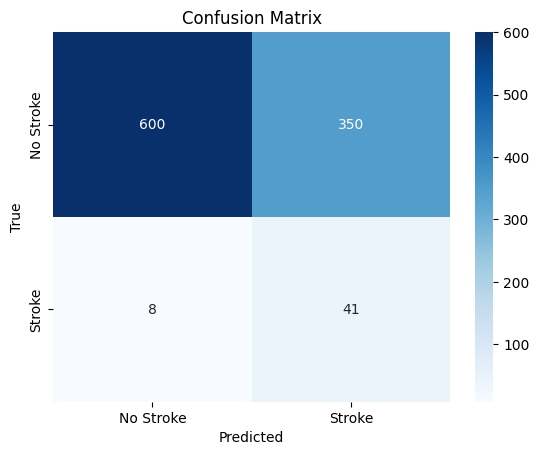

In [257]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, predict)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Classification Report

In [258]:
from sklearn.metrics import classification_report

print("Classification Report:\n", classification_report(y_test, predict))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.63      0.77       950
           1       0.10      0.84      0.19        49

    accuracy                           0.64       999
   macro avg       0.55      0.73      0.48       999
weighted avg       0.94      0.64      0.74       999

